# Exploratory Data Analysis (EDA) and Visualizations

The notebook details the process of exploring the labeled and merged dataframe `merged_cleaned_data.csv` through exploratory analysis, visualizations, correlation analysis, and hypothesis testing. Ultimately, we are able to discern interesting findings from the new dataset.


## Content
- Cleaning Mental Health Dataset (@ Shuting, remove assignment before submission)
- Cleaning Greenspace Dataset
- Adding Regions and Divisions Labels (@ Shuting)
- Merging Mental Health and Greenspace Datases
- Output to CSV

First, we will import the necessary libraries:

In [1]:
!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler

Then we will create a dataframe from our cleaned and merged dataset:

In [3]:
df = pd.read_csv("../data/cleaned_data/merged_cleaned_data.csv")

In [4]:
df.shape

#The shape of the df is: 228, 43. We have only 228 rows, because some of the cities in the Greenspace dataset were not reflected in the Mental Health dataset.
 

(228, 43)

The variable of interest that we want to explore is the MH Score from the CDC Mental Health Dataset. We find that this variable seems to follow a normal distribution:

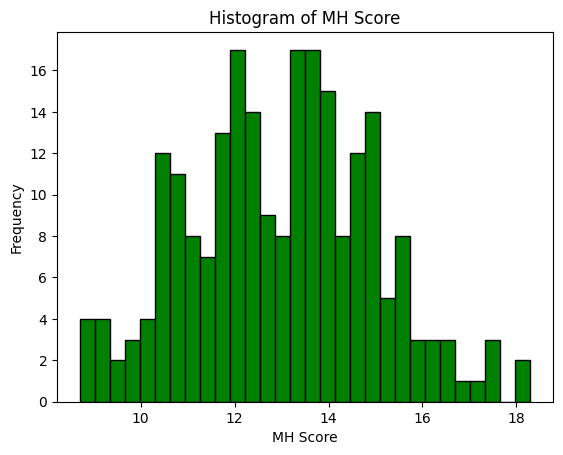

In [5]:
plt.hist(df['MH_Score'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of MH Score')
plt.xlabel('MH Score')
plt.ylabel('Frequency')
plt.show()

#seems to follow normal distribution

We run some more visualizations to get a general understanding of the distribution of some other notable features:

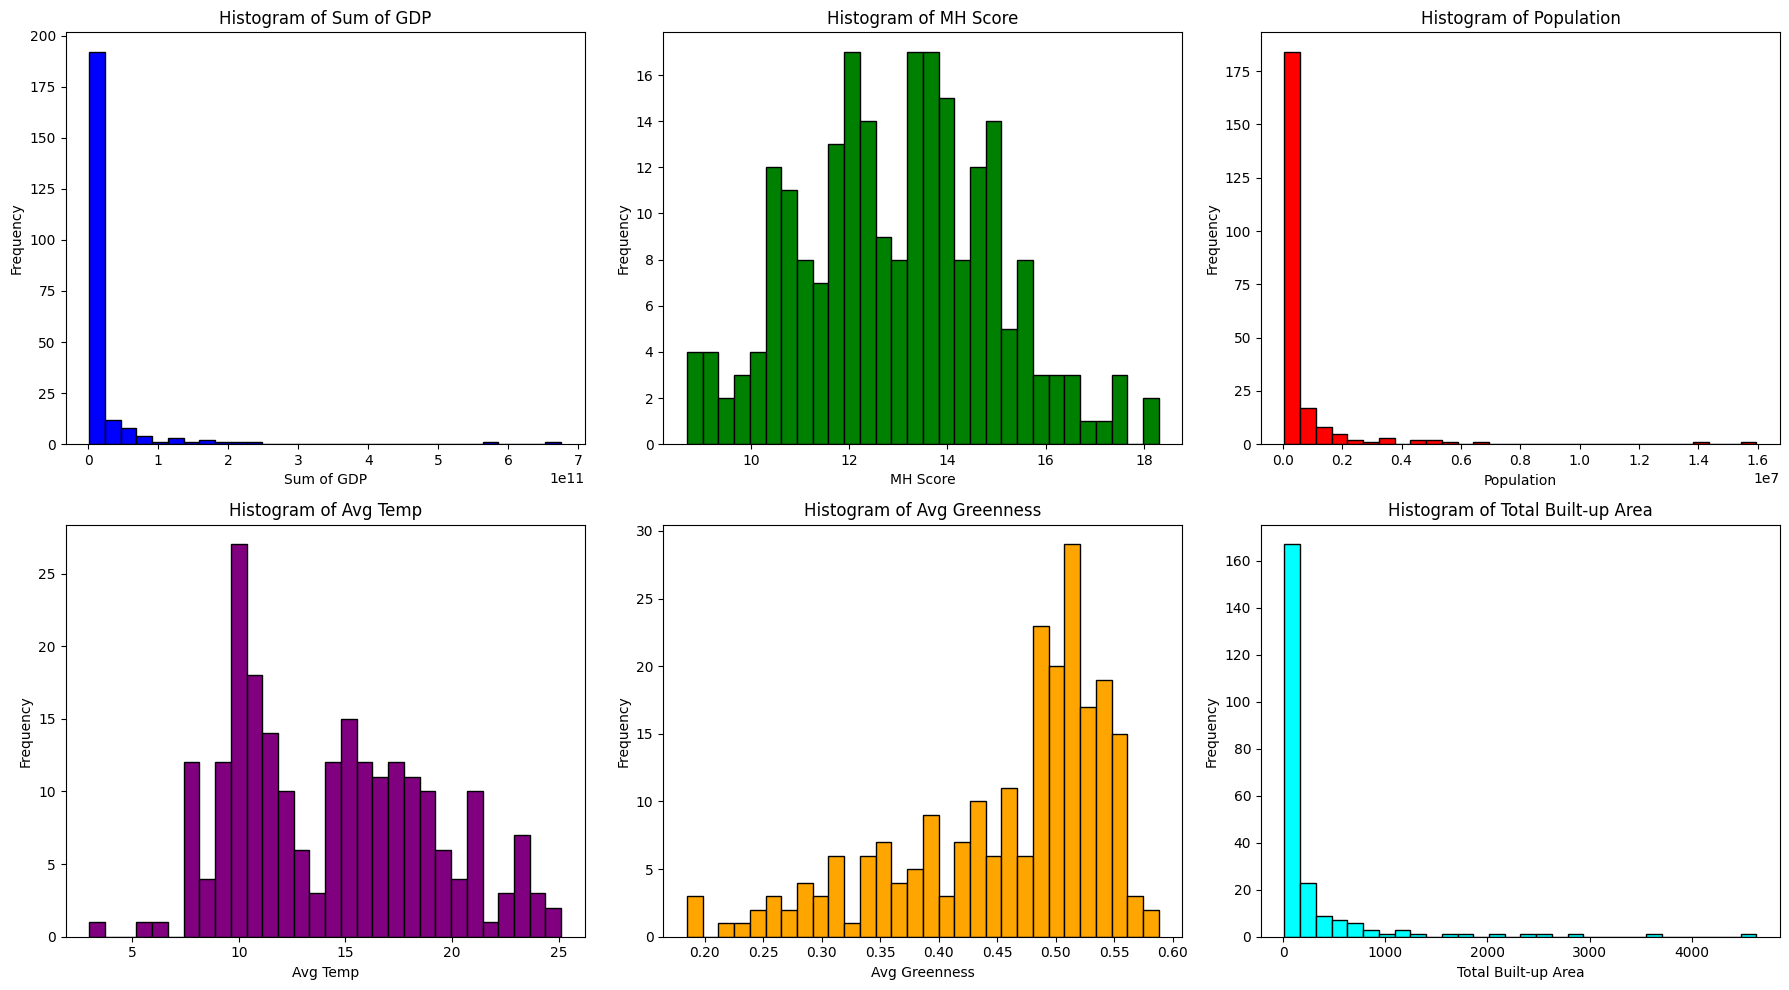

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

axs[0, 0].hist(df['Sum of GDP'], bins=30, color='blue', edgecolor='black')
axs[0, 0].set_title('Histogram of Sum of GDP')
axs[0, 0].set_xlabel('Sum of GDP')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['MH_Score'], bins=30, color='green', edgecolor='black')
axs[0, 1].set_title('Histogram of MH Score')
axs[0, 1].set_xlabel('MH Score')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(df['Population'], bins=30, color='red', edgecolor='black')
axs[0, 2].set_title('Histogram of Population')
axs[0, 2].set_xlabel('Population')
axs[0, 2].set_ylabel('Frequency')

axs[1, 0].hist(df['Avg Temp'], bins=30, color='purple', edgecolor='black')
axs[1, 0].set_title('Histogram of Avg Temp')
axs[1, 0].set_xlabel('Avg Temp')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['Avg Greenness'], bins=30, color='orange', edgecolor='black')
axs[1, 1].set_title('Histogram of Avg Greenness')
axs[1, 1].set_xlabel('Avg Greenness')
axs[1, 1].set_ylabel('Frequency')

axs[1, 2].hist(df['Total Built-up Area'], bins=30, color='cyan', edgecolor='black')
axs[1, 2].set_title('Histogram of Total Built-up Area')
axs[1, 2].set_xlabel('Total Built-up Area')
axs[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

These initial histograms show that besides the Mental Health Score, the other features seem to not follow a normal distribution. This will be useful information later when we conduct statistical testing. Next, let's explore the breakdown of State and Urban Center level in the dataset.

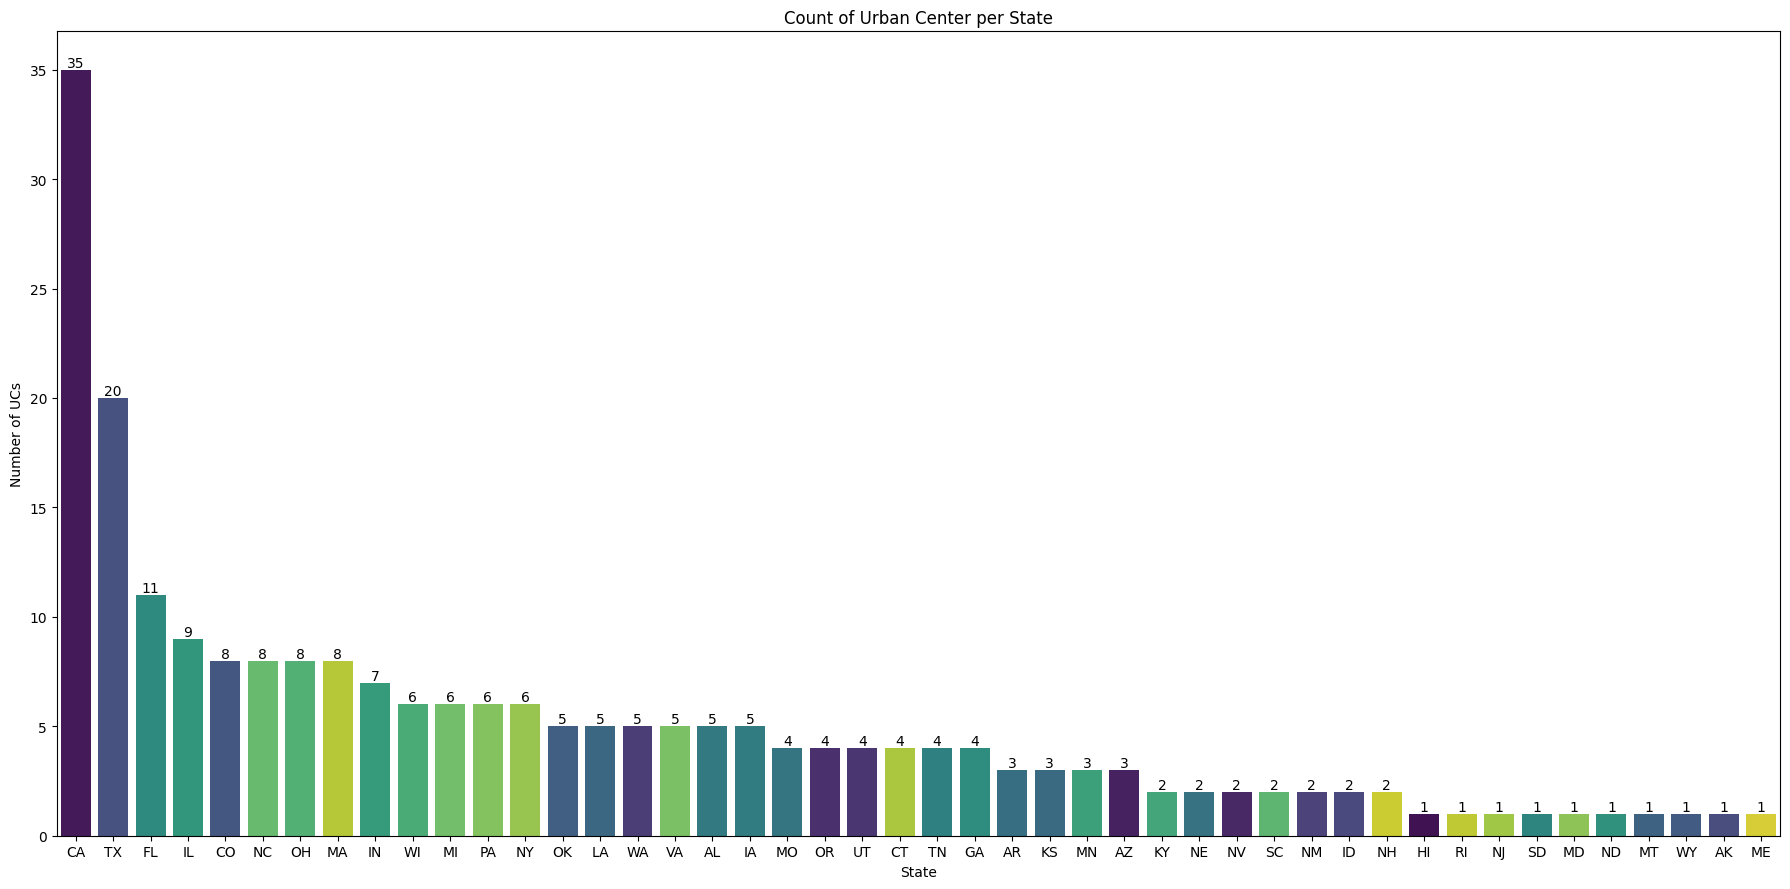

In [8]:
plt.figure(figsize=(18, 9))

state_counts = df['State'].value_counts().sort_values(ascending=False)
ax = sns.countplot(x='State', data=df, order=state_counts.index, hue='State', palette='viridis', legend=False)
#sns.countplot(x='State', data=df, order=state_counts.index, hue='State', palette='viridis',  legend=False)

plt.title('Count of Urban Center per State')
plt.xlabel('State')
plt.ylabel('Number of UCs')
    
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.tight_layout()
plt.show()

There are a few states like CA, TX, FL with significantly more Urban Centers in the dataset, and most of the US states had 5 or less Urban Centers in the dataset. This shows a limitation in the CDC data collected and a skew towards some states more than others. In order to compare appropriate states and UCs with each other, we need to note how many UCs the state has data for.

In [38]:
df['UCs in State'] = df['State'].map(state_counts) #raw number of how many UCs are in that State

labels = ['Scarce Data (1-3)', 'Some Data (4-5)', 'Moderate Data (6-9)',  'Data Rich (11-35)'] # States with counts between  3-1, 5- 4, 9-6, 35-11

df['State UC Data'] = pd.cut(df['UCs in State'], bins=[0, 3, 5, 9, 36], labels=labels, right=False)
#binning states by how data rich they are in terms of UC data

Next, we will quickly examine the data at a Urban Center level. We will see the Mental Health scores for the UCs with the best mental health and worst mental health. Remember that a higher MH_Score means worse mental health prevalence in that UC.

In [43]:
top_n_highest_mh = df.sort_values(by='MH_Score', ascending=False).head(10)[['Urban Center', 'State', 'MH_Score']]

top_n_highest_mh
# New Bedford, MA / Fall River, MA / Springfield, MA/ Flint, MI/ Reading, PA     #Scores from 17.4 to 18.3, Top 10 states include MA, MI, PA, OH, TN


,Urban Center,State,MH_Score
220,New Bedford,MA,18.3
219,Fall River,MA,18.2
216,Springfield,MA,17.5
188,Flint,MI,17.4
203,Reading,PA,17.4
193,Youngstown,OH,17.1
226,Lawrence,MA,16.9
170,Dayton,OH,16.6
222,Brockton,MA,16.6
111,Memphis,TN,16.4


We notice that New Bedford, MA has the worst mental health score with 18.3. Flint, MI has a score of 17.4. The top 10 highest MH Score states
include MA, MI, PA, OH, TN. 

In [45]:
top_n_lowest_mh = df.sort_values(by='MH_Score', ascending=True).head(10)[['Urban Center', 'State', 'MH_Score']]

top_n_lowest_mh

,Urban Center,State,MH_Score
184,Cary,NC,8.7
140,Roswell,GA,8.8
137,Rochester,MN,8.9
199,Washington D.C.,VA,8.9
124,Fargo,ND,9.2
0,Honolulu,HI,9.2
73,Boulder,CO,9.3
112,Sioux Falls,SD,9.3
183,Ann Arbor,MI,9.6
105,Lincoln,NE,9.6


The best Urban Centers for Mental Health scores include Cary, NC and Ann Arbor, MI ranging from 8.7 to 9.6 scores. We also notice an interesting trend which is that there is a more diverse range of states represented here in the best MH states than the worst MH states (which tended to be the same recurring states).

Next, we will go in depth on the features in the merged dataset. We want to cast a wide net at first in terms of features in order to understand which ones have a correlation with Mental Health. Then we will narrow those down, and focus on them.

Let's first split the features by categorical and numerical data so we can make correlations and statistical tests:

In [49]:
categorical_df = df.select_dtypes(include=['object', 'category'])
categorical_df.head()

,State,Urban Center,Biome,Soil Group,Cities in Urban Center_copy,Region,Division,State UC Data
0,HI,Honolulu,Tropical and Subtropical Dry Broadleaf Forests,Vertisols,Honolulu; Waipahu; Pearl City; Aiea,West,Pacific,Scarce Data (1-3)
1,CA,Santa Maria,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Maria,West,Pacific,Data Rich (11-35)
2,CA,Santa Barbara,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Santa Barbara,West,Pacific,Data Rich (11-35)
3,CA,Salinas,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Salinas,West,Pacific,Data Rich (11-35)
4,CA,Oxnard,"Mediterranean Forests, Woodlands, and Scrub",Luvisols,Oxnard; Ventura,West,Pacific,Data Rich (11-35)


In [50]:
non_categorical_df = df.select_dtypes(exclude=['object', 'category'])
non_categorical_df.drop(columns=['Unnamed: 0', 'MH_Population', 'UC_Grouping', 'PopulationDelta', 'PopDensity_MH','PopDensity_GS'], inplace=True)
non_categorical_df.head()

,MH_Score,Urban Center Area,Latitude,Longitude,Avg Elevation,Avg Precipitation,Avg Temp,Avg Greenness,Total Green Area,Population,...,Particulate Matter Emissions Residential,Particulate Matter Emissions Industry,Particulate Matter Emissions Transport,Particulate Matter Emissions Agriculture,Total Concertation of Particulate Matter,% of Pop in High Green Area,% of Open Spaces,Land Use Efficiency,Max Magnitude of Heatwaves,UCs in State
0,9.2,185.0,21.340678,-157.893497,52.296435,741.625015,23.526622,0.369290,183.811667,512853.6667,...,40.144556,174.221274,23.536766,0.047534,5.765125,0.226415,56.41,0.074385,NaN,1
1,15.0,55.0,34.923123,-120.434372,87.128092,245.175001,14.718191,0.312846,54.450694,123181.2848,...,8.503971,35.140393,3.014213,0.047215,11.630900,0.040129,23.64,0.481144,2.79174,35
2,11.1,60.0,34.427664,-119.743693,38.298095,183.925007,15.376907,0.362785,59.576284,114753.1502,...,14.048873,30.528288,3.263458,0.013192,13.803700,0.061348,36.50,0.556762,4.25502,35
3,14.7,54.0,36.688991,-121.640831,21.308919,324.925007,15.274110,0.339631,53.886276,149784.3360,...,16.569708,65.973825,6.895041,0.059792,12.376300,0.076114,24.61,0.843804,11.39150,35
4,13.6,136.0,34.217486,-119.209132,21.899179,238.675003,17.053577,0.299903,135.224578,297806.3934,...,30.233594,118.460613,16.894830,0.072824,17.010900,0.036199,28.65,0.435584,NaN,35


There are about 30 numerical features that paint a picture for each Urban Center in terms of geographical, socioeconomic, environmental, and pollution related data. 

We decided to first explore all the numerical features to see interesting relationships, and then narrow down those relevant to Mental Health. We must first explore all correlations to see if there any confounders.

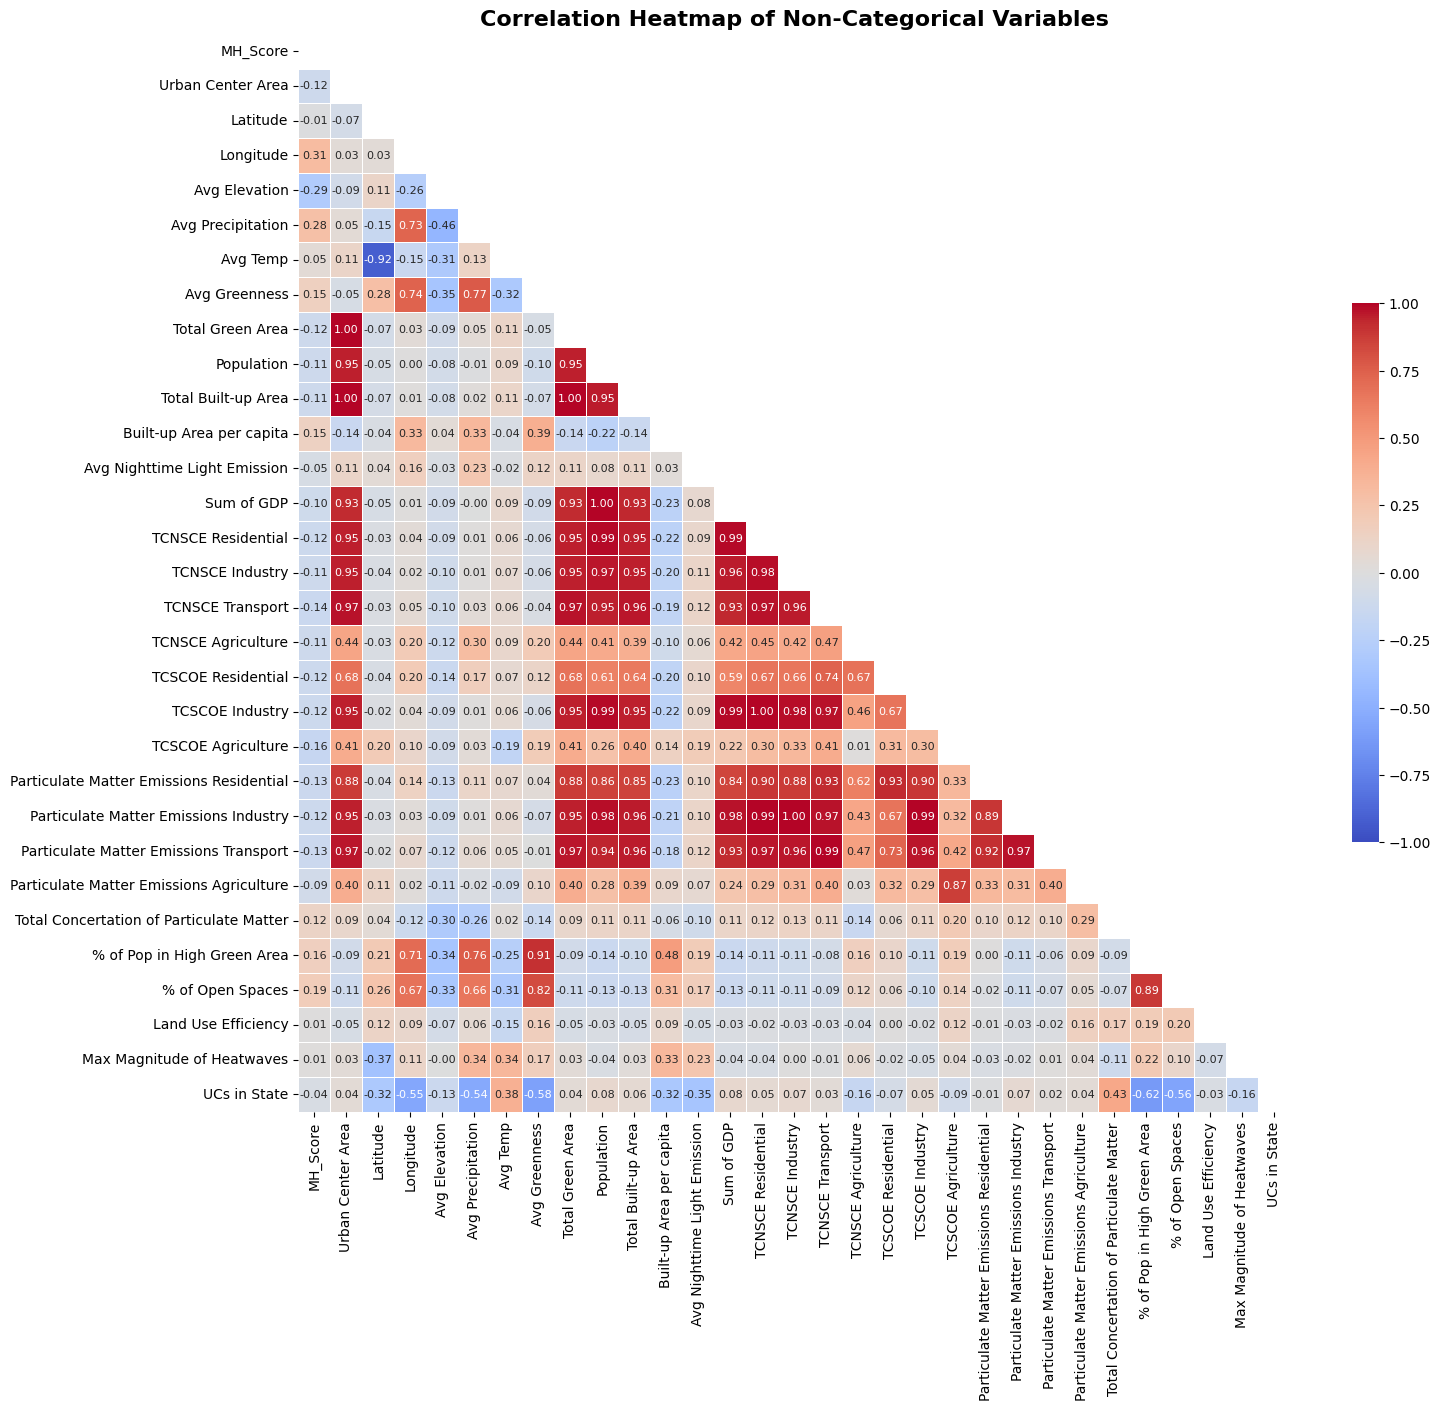

In [103]:
corr_matrix = non_categorical_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) #hide upper triangle which is redundant

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, mask = mask, annot=True,cmap='coolwarm', vmin=-1, vmax=1, 
            fmt='.2f', linewidths=.5, annot_kws={"size": 8}, cbar_kws={"shrink": 0.5})
plt.title('Correlation Heatmap of Non-Categorical Variables', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.show()

As you can see visually, there are some features that are highly correlated with each other. For example, sum of GDP has a correlation of 1 with Population! The emissions and particulate matter features are highly correlated with each other as well, which is intuitive. Interestingly, Agricultural emissions and particulate matter are only moderately correlated with the other types of emissions/PM. This makes sense since Urban Centers with agricultural emissions will be quite different from non-agricultural ones. This heatmap shows us possible confounding variables.

We will then conduct a Spearman Rank Correlation between these features with the MH_Score. We are deciding to use Spearman because that the Mental Health Score tended to follow a normal distribution, and we are dealing with a mixture of normally distributed and non-normally distributed numerical variables.

In [53]:
spearcorr = non_categorical_df.corr(method='spearman')['MH_Score'].drop('MH_Score').sort_values(ascending=False)
spearcorr.head()

Longitude                      0.341468
Avg Precipitation              0.310154
Avg Greenness                  0.204443
% of Open Spaces               0.196512
% of Pop in High Green Area    0.162597
Name: MH_Score, dtype: float64

We will now create a Heatmap exploring the numerical features that have a correlation with Mental Health.

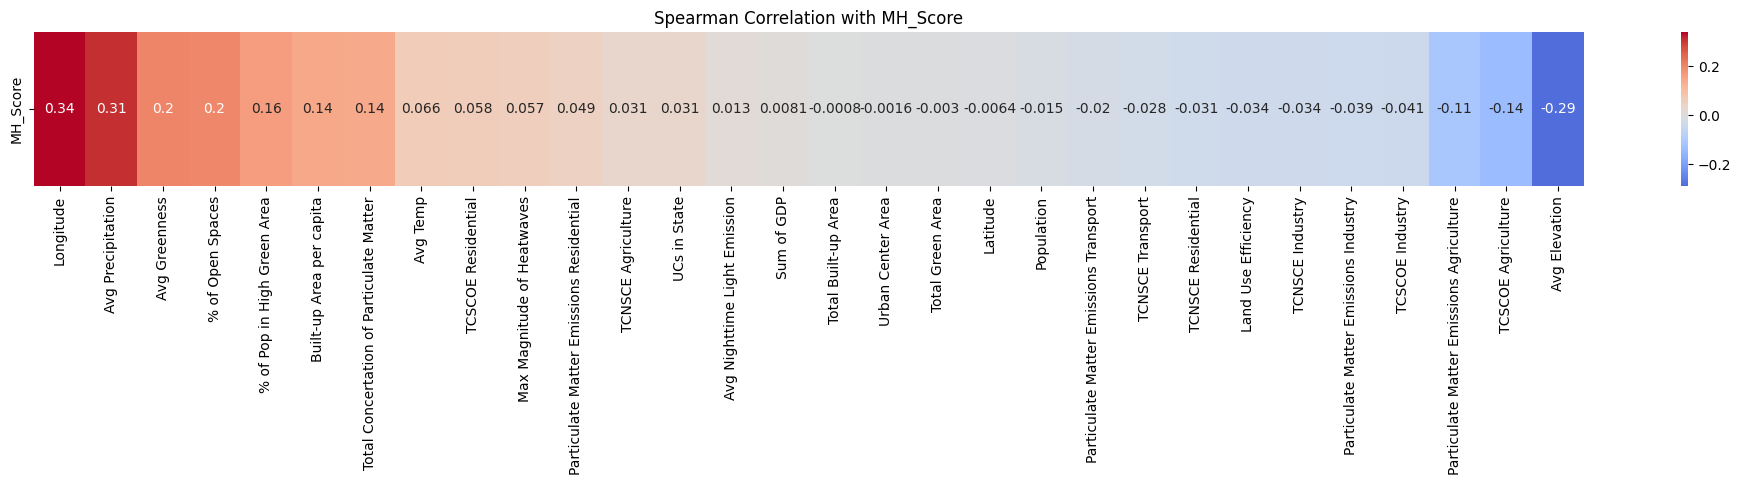

In [54]:
spcorr = spearcorr.to_frame().T

plt.figure(figsize=(25, 2))
sns.heatmap(spcorr, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation with MH_Score')
plt.show()

We will then create a threshold for the Spearman Correlation so that we can notice significant features

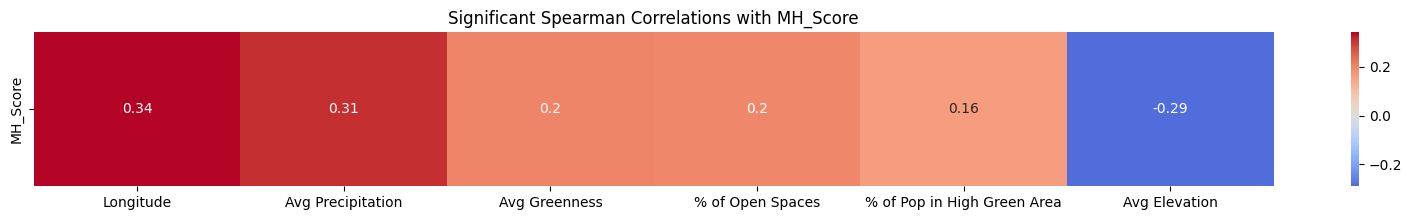

In [56]:
bthreshold = -0.15
tthreshold = 0.15

ssignicorr = spearcorr[(spearcorr < bthreshold) | (spearcorr > tthreshold)]

ssignicorrt = ssignicorr.to_frame().T

if not ssignicorrt.empty: #checking for empty correlations
    plt.figure(figsize=(20, 2))
    sns.heatmap(ssignicorrt, annot=True, cmap='coolwarm', center=0)
    plt.title('Significant Spearman Correlations with MH_Score')
    plt.show()
else:
    print("No significant correlations found")

The analysis of our data has uncovered unexpected and intriguing patterns regarding factors influencing mental health scores. Contrary to common assumptions, higher levels of average greenness appear to correlate with poorer mental health outcomes. This finding challenges the conventional wisdom that green spaces universally benefit mental wellbeing, suggesting a nuanced relationship that warrants deeper investigation. Moreover, our data indicates that total green area shows minimal to no correlation with mental health scores.

Another surprising discovery is the negative correlation observed between longitude and mental health scores. As one moves eastward, mental health scores tend to decline, hinting at geographical factors that may influence mental wellbeing. Additionally, lower average elevation is associated with better mental health outcomes, a finding that contrasts with expectations and highlights the complexity of our data.

Next, we will explore the categorical feastures in the dataset, where we are not able to run a direct Pearson or Spearman correlation on them. First, we will conduct a ANOVA test and then visualize by categorical feature. ANOVA is appropriate here since we have more than two groups and want to determine if there are statistically significant differences in the means of a continuous dependent variable (MH_Score) across these groups.

In [58]:
#By State

#ANOVA b/w numerical and categorical variable
f_statistic, p_value = f_oneway(*(df[df['State'] == state]['MH_Score'] for state in df['State'].unique()))

print("F statistic:", f_statistic)
print("P value:", p_value)

F statistic: 6.019130015672211
P value: 1.1516240928602605e-18


The small p value indicates strong evidence against the null hypothesis, suggesting that there is a significant difference in the means of MH_Score across different categories of State. Aka there is a correlation between MH_Score and State. Let's explore this visually

/var/folders/7_/t1q3vnms7b95r451sh6jxd7h0000gn/T/ipykernel_32980/1996315821.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State', y='MH_Score', data=df, order=mean_order, palette='inferno')


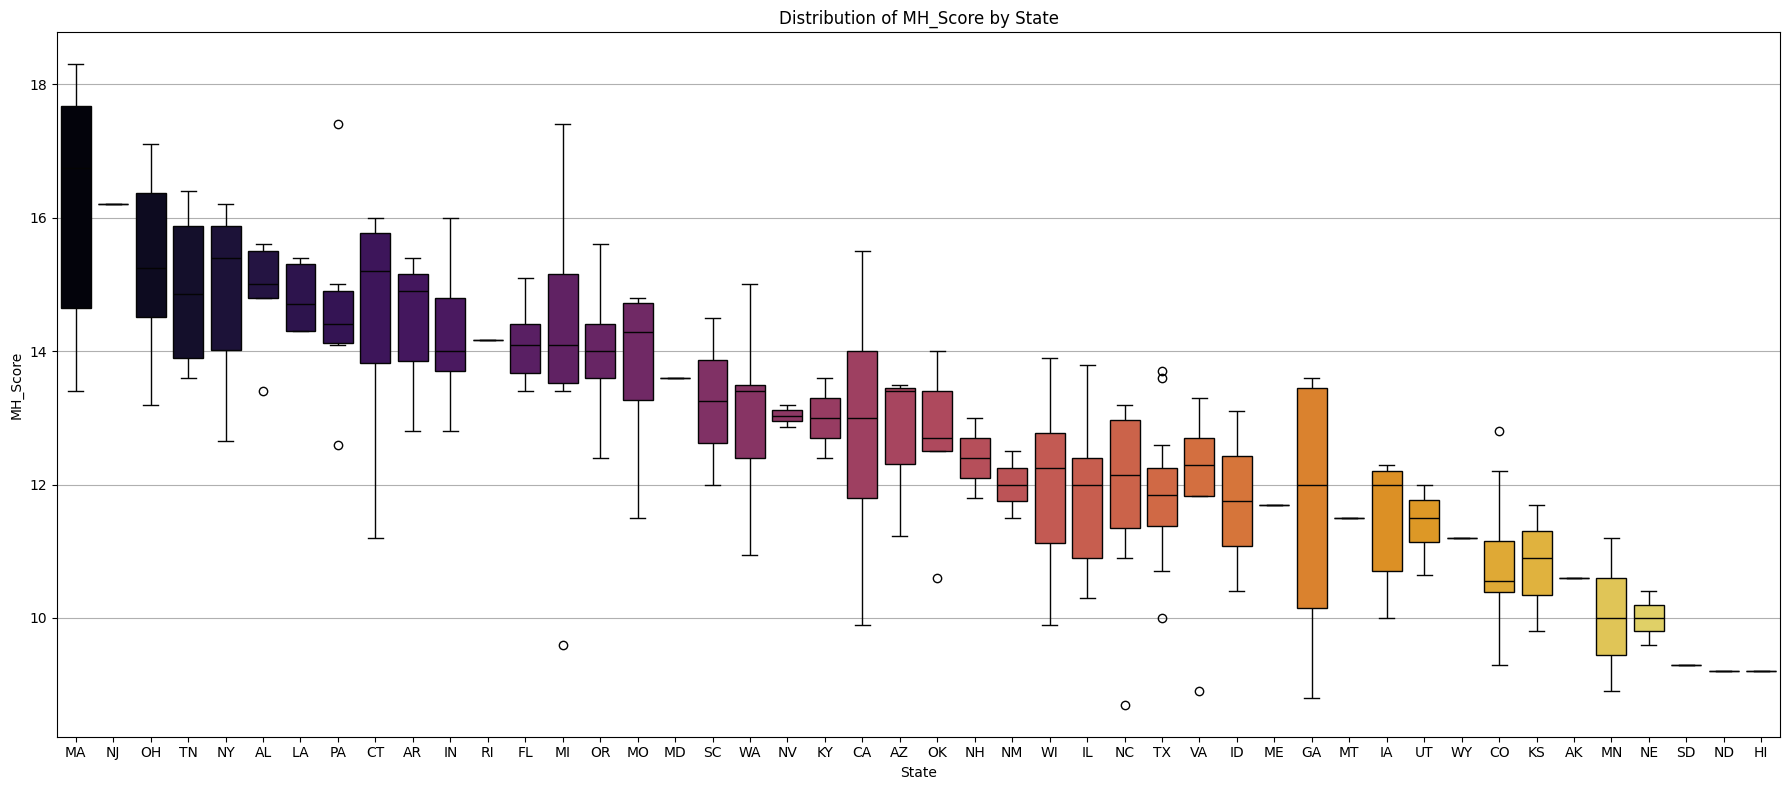

In [68]:
#Visualizing by State

mean_order = df.groupby('State')['MH_Score'].mean().sort_values(ascending=False).index

plt.figure(figsize=(18, 8))
sns.boxplot(x='State', y='MH_Score', data=df, order=mean_order, palette='inferno')

plt.title('Distribution of MH_Score by State')
plt.xlabel('State')
plt.ylabel('MH_Score')

plt.grid(axis='y')

plt.tight_layout()
plt.show()

/var/folders/7_/t1q3vnms7b95r451sh6jxd7h0000gn/T/ipykernel_32980/2425686272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='State UC Data', y='MH_Score', data=df, order=labels, palette='coolwarm')


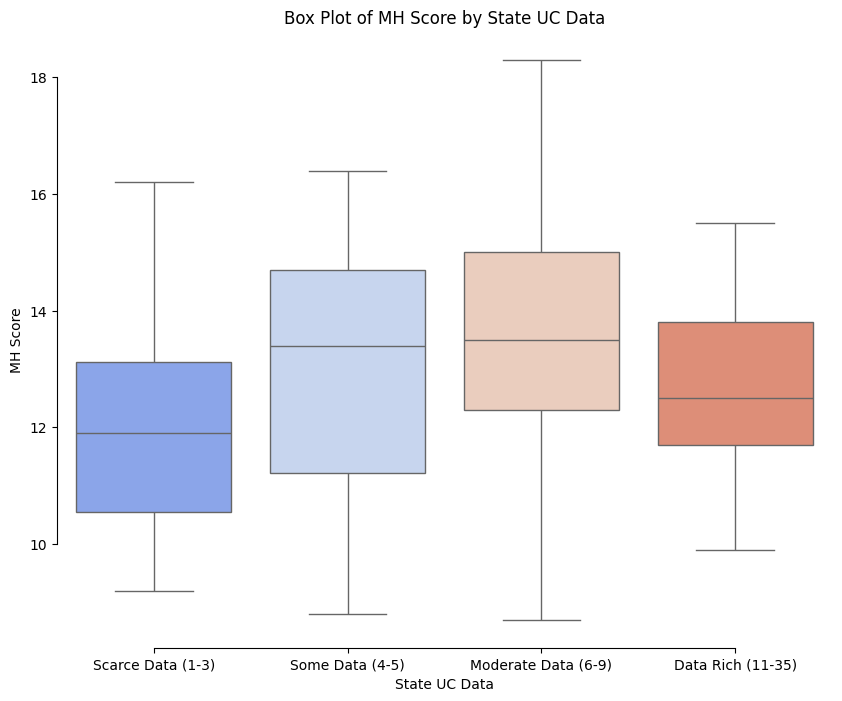

In [111]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='State UC Data', y='MH_Score', data=df, order=labels, palette='coolwarm')

plt.title('Box Plot of MH Score by State UC Data')
plt.xlabel('State UC Data')
plt.ylabel('MH Score')

sns.despine(trim=True)  # Remove unnecessary spines and trim axes

plt.show()


This boxplot by the data richness of each state suggests that states with scarce UC data have better mental health scores! These states also tended to be more rural. This could be a limitation in our dataset, where more rural states have less data to truly capture the mental health status of their population.

In [64]:
#ANOVA Biome

f_statistic, p_value = f_oneway(*(df[df['Biome'] == biome]['MH_Score'] for biome in df['Biome'].unique()))

print("F statistic:", f_statistic)
print("P value:", p_value)

F statistic: 8.194477873614987
P value: 1.0919134962066474e-09


 The extremely small p value (approximately 1.09e-09) indicates strong evidence against the null hypothesis, suggesting that at least one pair of biomes significantly differs in terms of MH_Score. This finding suggests that biome type has some impact on mental health scores, needing further investigation into specific biome characteristics.

/var/folders/7_/t1q3vnms7b95r451sh6jxd7h0000gn/T/ipykernel_32980/3443424018.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Biome', y='MH_Score', data=df, order=mean_order, palette='viridis', linewidth=1.5)


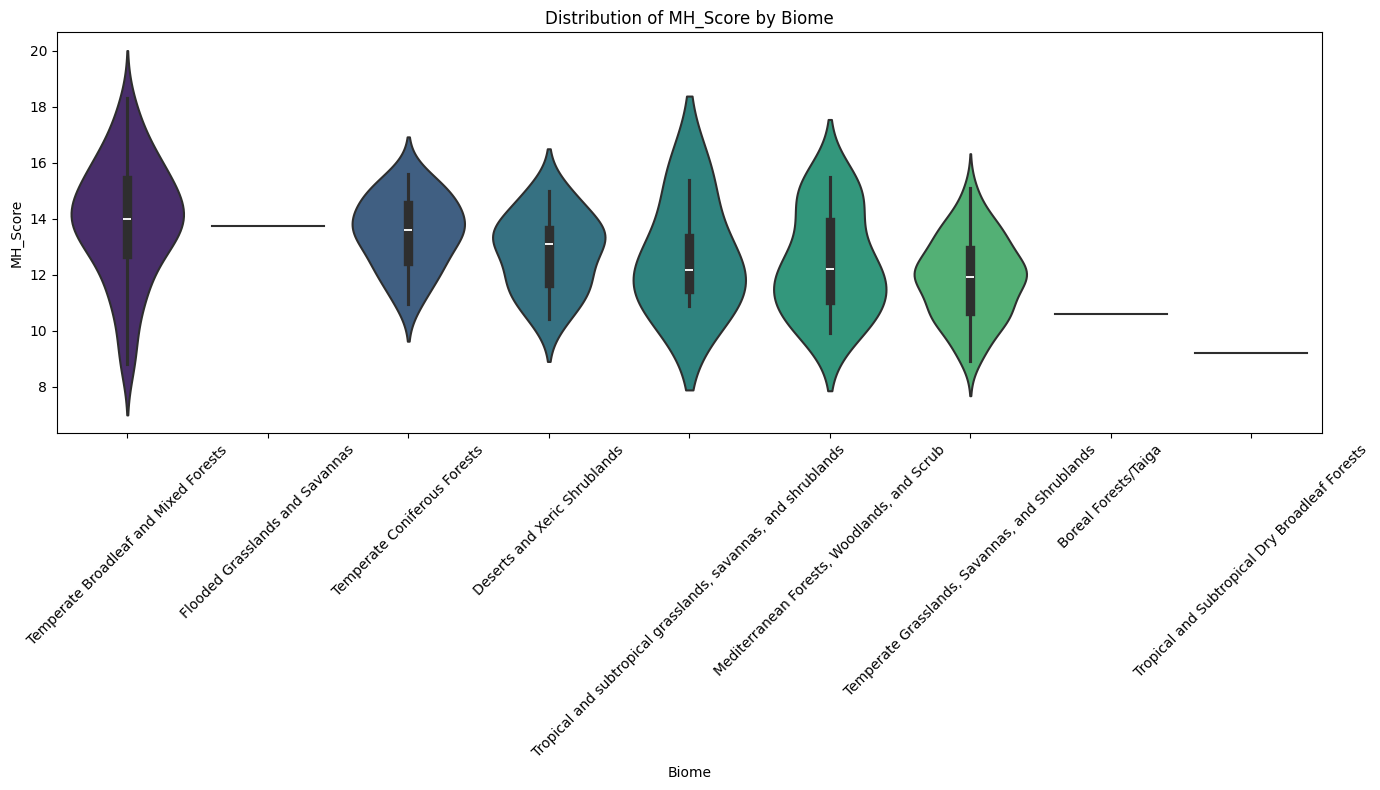

In [71]:
#By biome

mean_order = df.groupby('Biome')['MH_Score'].mean().sort_values(ascending=False).index

plt.figure(figsize=(14, 8))
sns.violinplot(x='Biome', y='MH_Score', data=df, order=mean_order, palette='viridis', linewidth=1.5)

plt.xticks(rotation=45)

plt.title('Distribution of MH_Score by Biome')
plt.xlabel('Biome')
plt.ylabel('MH_Score')

plt.tight_layout()
plt.show()

In [73]:
#ANOVA Soil

f_statistic, p_value = f_oneway(*(df[df['Soil Group'] == soil]['MH_Score'] for soil in df['Soil Group'].unique()))

print("F statistic:", f_statistic)
print("P value:", p_value)


F statistic: 3.2734732438656575
P value: 2.8667217522530873e-05


An interesting finding is the ANOVA results on Soil group! The p value of approximately 0.00003 is much smaller than the conventional significance level of 0.05, indicating strong evidence against the null hypothesis. This suggests that at least one pair of soil groups significantly differs in terms of MH_Score.

/var/folders/7_/t1q3vnms7b95r451sh6jxd7h0000gn/T/ipykernel_32980/2319889477.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Soil Group', y='MH_Score', data=df, order=mean_order, palette='cividis')


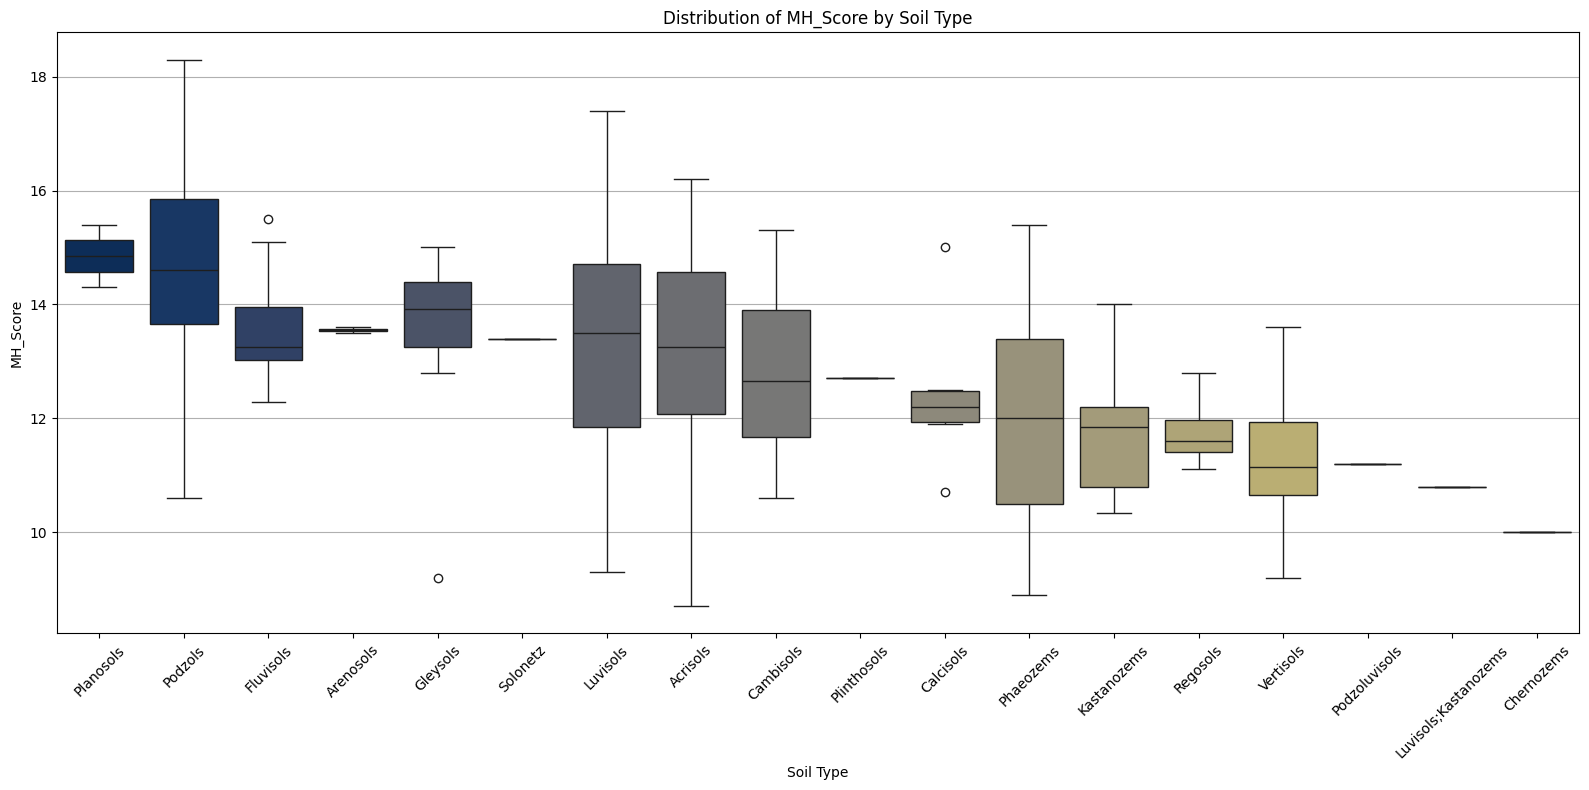

In [76]:
mean_order = df.groupby('Soil Group')['MH_Score'].mean().sort_values(ascending=False).index

plt.figure(figsize=(16, 8))
sns.boxplot(x='Soil Group', y='MH_Score', data=df, order=mean_order, palette='cividis')

plt.xticks(rotation=45)
plt.title('Distribution of MH_Score by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('MH_Score')

plt.grid(axis='y')

plt.tight_layout()
plt.show()

Now by analyzing all of these categorical and numerical features, we have found that there are several factors in an Urban Center that are worth exploration and further research. When it comes to comparing Mental Health Score between Urban Centers, we will want to minimize confounding features such as major population differences and socioeconomic status. We will now create a function to find, given an input Urban Center, the most similar Urban Center. We will then use this on cities from the Top n worst or best mental health score Urban Centers.

We will exclude features such as state, longitude, latitude, biome, Urban Center, etc as these will distort the comparison. We want to use some significant features to create a fair comparison. We decided to use 5 of the 6 most correlated features with Mental Health Score, as well as control for Population and Sum of GDP.

In [80]:
signicols = ['Population','Sum of GDP', 'Avg Elevation', 'Avg Precipitation', 'Avg Greenness', '% of Pop in High Green Area', '% of Open Spaces']

In [82]:
scaler = StandardScaler()
df[signicols] = scaler.fit_transform(df[signicols]) #normalize data so they can be compared
df[signicols].head()

,Population,Sum of GDP,Avg Elevation,Avg Precipitation,Avg Greenness,% of Pop in High Green Area,% of Open Spaces
0,-0.071230,-0.010956,-0.619048,-0.374429,-0.988007,-0.846805,0.068951
1,-0.303449,-0.277777,-0.529327,-1.537855,-1.624219,-1.462687,-1.494681
2,-0.308472,-0.277997,-0.655105,-1.681394,-1.061333,-1.392535,-0.881062
3,-0.287595,-0.268165,-0.698867,-1.350962,-1.322314,-1.343719,-1.448397
4,-0.199384,-0.179006,-0.697346,-1.553088,-1.770099,-1.475682,-1.255627


The following functions allow for the comparison of Urban Centers based on their feature vectors. eucliddist quantifies the similarity between two Urban Centers by calculating the Euclidean distance between their feature vectors. A smaller Euclidean distance will indicate greater similarity in feature space. This will allow us to input a Urban Center and find the most similar centers, controlling for significant confounding features.

In [84]:
#calc euclid dist
def eucliddist(uc1, uc2):
    uc1data = df[df['Urban Center'] == uc1]
    uc2data = df[df['Urban Center'] == uc2]
    uc1feats = uc1data[signicols].values.flatten()
    uc2feats = uc2data[signicols].values.flatten()
    #print(uc1feats.shape, uc2feats.shape)

    if uc1feats.shape != uc2feats.shape:
        print(f"shapes mismatch for {uc1} and {uc2}")
        return np.inf
    return np.linalg.norm(uc1feats - uc2feats)

In [85]:
#calc similarity
def calcsimilar(inputuc):
    sims = {}
    for uc in df['Urban Center']:
    #for uc in df['UC Grouping']  #use iloc to get index to get urban center for that UC
        if uc != inputuc:
            sim = eucliddist(inputuc, uc)
            sims[uc] = sim
    return sims

In [86]:
def findclosestucs(inputuc, k=1):
    sims = calcsimilar(inputuc)
    sortedsims = sorted(sims.items(), key=lambda x: x[1])
    closestucs = sortedsims[:k]
    return closestucs

In [88]:
inputuc = 'Flint'
closestucs = findclosestucs(inputuc, k=5)

print(f"The closest ucs to {inputuc} are:")
for uc, similarity in closestucs:
    print(f"{uc} (Similarity: {similarity})")

shapes mismatch for Flint and Portland
shapes mismatch for Flint and Lafayette
shapes mismatch for Flint and Lawrence
shapes mismatch for Flint and Springfield
shapes mismatch for Flint and Columbus
shapes mismatch for Flint and Springfield
shapes mismatch for Flint and Rochester
shapes mismatch for Flint and Bloomington
shapes mismatch for Flint and Bloomington
shapes mismatch for Flint and Lafayette
shapes mismatch for Flint and Columbus
shapes mismatch for Flint and Rochester
shapes mismatch for Flint and Springfield
shapes mismatch for Flint and Lawrence
shapes mismatch for Flint and Portland
The closest ucs to Flint are:
Lansing (Similarity: 0.30017870540928876)
Sioux City (Similarity: 0.35706034238522705)
Des Moines (Similarity: 0.48713015050640085)
Rockford (Similarity: 0.49830036839102015)
Waukegan (Similarity: 0.5520466881654561)


In [89]:
df[df['Urban Center'] == 'Flint']['MH_Score']
df[df['Urban Center'] == 'Des Moines']['State']

114    IA
Name: State, dtype: object